<a href="https://colab.research.google.com/github/Salitre97/ECGR-4105-Intro_to_ML/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import time
import torchvision
from torchvision import transforms


In [ ]:
file_id = '1yvScnvrecfBf0cSLq76kRENXdi2_N-lN'

url = f'https://drive.google.com/uc?id={file_id}'

# preprocessing

In [ ]:
# Load your dataset
housing_data = pd.DataFrame(pd.read_csv(url))
#housing_data.head()

In [ ]:
# Replace 'yes' and 'no' with 1 and 0
housing_data.replace({'yes': 1, 'no': 0}, inplace=True)
housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'])

housing_data.head(10)

In [ ]:
# Checking Null values
housing_data.isnull().sum()*100/housing_data.shape[0]


In [ ]:
housing_data.shape

In [ ]:
# features for training

features = [col for col in housing_data.columns if col != 'price']

# Extract input and output values for training
x = housing_data[features].values
y = housing_data['price'].values.reshape(-1,1)

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled.shape, y.shape

print(features)

In [ ]:
# Split data: validation set = 20 percent
x_train, x_val, y_train, y_val = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

# Convert to Tensor
x_train_tensor= torch.tensor(x_train, dtype=torch.float32)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

x_train_tensor.shape[1]

#Problem 1a

In [ ]:
# Training loop for nueral network
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, x_val, y_train, y_val):
    train_losses = []
    val_losses = []

    for epoch in range(1, n_epochs + 1):
        p_train = model(x_train)
        loss_train = loss_fn(p_train, y_train)

        p_val = model(x_val)
        loss_val = loss_fn(p_val, y_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        train_losses.append(loss_train.detach().item())
        val_losses.append(loss_val.detach().item())

        if epoch == 1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")

    return train_losses, val_losses

In [ ]:
'''
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(14, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, input):
        input = F.relu(self.hidden(input))
        input = self.output(input)

        return input
'''

In [ ]:
# Initialize the model
#model1 = SimpleNN()
neuron_count = 32
input = x_train_tensor.shape[1]

model1 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(input, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)

In [ ]:
train_losses1, val_losses1 = training_loop(
    n_epochs = 10000,
    optimizer = optimizer1,
    model = model1,
    loss_fn = loss_fn,
    x_train = x_train_tensor,
    x_val = x_val_tensor,
    y_train = y_train_tensor,
    y_val = y_val_tensor)

#Problem 1b



In [ ]:
'''
class MultiLayerNN(nn.Module):
    def __init__(self):
        super().__init__()

        # Define first hidden layer
        self.hidden1 = nn.Linear(14, 32)
        # Define second hidden layer
        self.hidden2 = nn.Linear(32, 64)
        # Define third hidden layer
        self.hidden3 = nn.Linear(64, 16)
        # Define the output layer
        self.output = nn.Linear(16, 1)

    def forward(self, input):
        # Pass input through the first hidden layer
        input = F.leaky_relu(self.hidden1(input))
        # Pass through the second hidden layer
        input = F.leaky_relu(self.hidden2(input))
        # Pass through the second hidden layer
        input = F.leaky_relu(self.hidden3(input))
        # Output layer
        input = self.output(input)

        return input
'''

In [ ]:
#model2 = MultiLayerNN()
input = x_train_tensor.shape[1]
neuron_count1 = 32
nueron_count2 = 64
neuron_count3 = 16

model2 =  nn.Sequential(OrderedDict([
    ('hidden_linear1', nn.Linear(input, neuron_count1)),
    ('hidden_activation1', nn.Tanh()),
    ('hidden_linear2', nn.Linear(neuron_count1, nueron_count2)),
    ('hidden_activation2', nn.Tanh()),
    ('hidden_linear3', nn.Linear(nueron_count2, neuron_count3)),
    ('hidden_activation3', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count3, 1)),
]))
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)
loss_fn = nn.MSELoss()


In [ ]:

# Train the model
train_losses2, val_losses2 = training_loop(
    n_epochs = 3000,
    optimizer = optimizer2,
    model = model2,
    loss_fn = loss_fn,
    x_train = x_train_tensor,
    x_val = x_val_tensor,
    y_train = y_train_tensor,
    y_val = y_val_tensor)

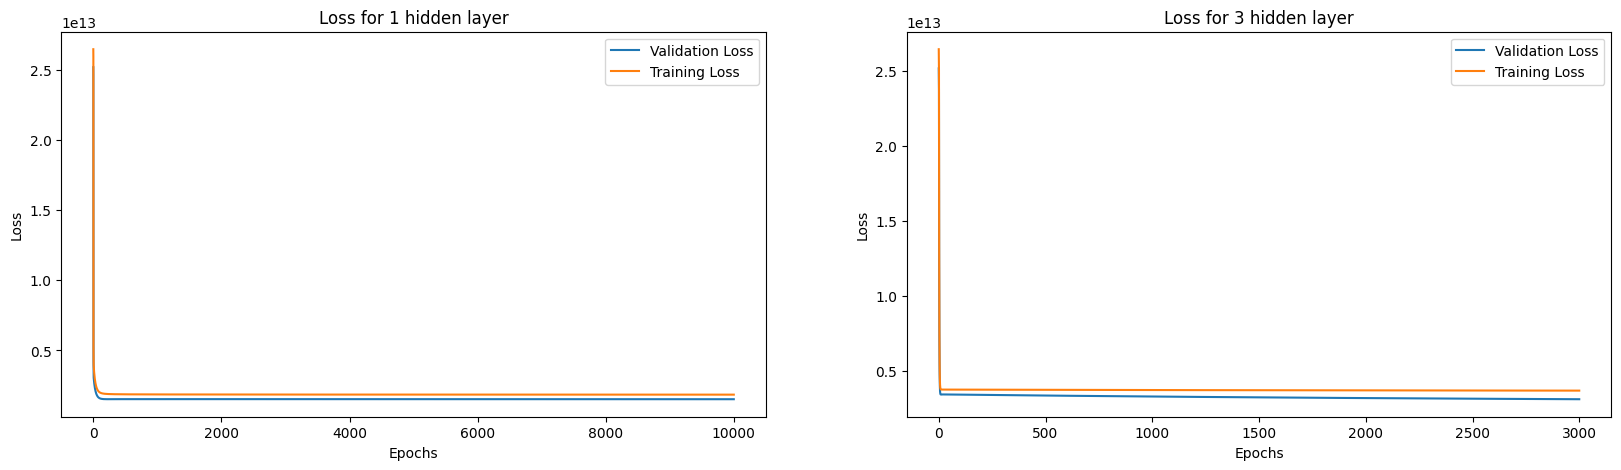

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
# Plot both training and validation loss
plt.plot(val_losses1, label='Validation Loss')
plt.plot(train_losses1, label='Training Loss')
plt.title('Loss for 1 hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
# Plot both training and validation loss
plt.plot(val_losses2, label='Validation Loss')
plt.plot(train_losses2, label='Training Loss')
plt.title('Loss for 3 hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Problem 2a


In [4]:
from torchvision import datasets

In [5]:
'''
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)
'''

100%|██████████| 170498071/170498071 [00:03<00:00, 47565818.89it/s]


Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/
Files already downloaded and verified


In [15]:
# Load and transform the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize the images
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Files already downloaded and verified


In [18]:
# Load and transform the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize the images
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the model
model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512, 10),
    nn.LogSoftmax(dim=1)
)

# Define loss function and optimizer
loss_fn = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

# Training loop
n_epochs = 100
start_time = time.time()

for epoch in range(n_epochs):
    total_loss = 0
    for imgs, labels in trainloader:
        outputs = model(imgs.view(imgs.size(0), -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(trainloader)
    print(f"Epoch: {epoch}, Average Loss: {avg_loss}")

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds.")

# Evaluate the network
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in testloader:
        outputs = model(imgs.view(imgs.size(0), -1))
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

Files already downloaded and verified
Files already downloaded and verified
Epoch: 0, Average Loss: 1.8726297953854436
Epoch: 1, Average Loss: 1.7568457000090947
Epoch: 2, Average Loss: 1.715541638986534
Epoch: 3, Average Loss: 1.686918279551484
Epoch: 4, Average Loss: 1.660105368060529
Epoch: 5, Average Loss: 1.636833547021422
Epoch: 6, Average Loss: 1.6167963578572968
Epoch: 7, Average Loss: 1.594836446482812
Epoch: 8, Average Loss: 1.5750123155696312
Epoch: 9, Average Loss: 1.5555073054855133
Epoch: 10, Average Loss: 1.5351540062128735
Epoch: 11, Average Loss: 1.5151189146444315
Epoch: 12, Average Loss: 1.4960183132335048
Epoch: 13, Average Loss: 1.475952383197482
Epoch: 14, Average Loss: 1.4568614077080242
Epoch: 15, Average Loss: 1.436964368881167
Epoch: 16, Average Loss: 1.4177941806481014
Epoch: 17, Average Loss: 1.3985638764813124
Epoch: 18, Average Loss: 1.3804230093955994
Epoch: 19, Average Loss: 1.362308737871897
Epoch: 20, Average Loss: 1.3427568081852115
Epoch: 21, Average